In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 100

df = pd.read_csv('CR_COST_FC.csv', converters={'PARTY_ID': str, 'COM_ID': str, 'CNTR_SIZE': str})
df['POD'] = pd.to_datetime(df['POD'])
df['ENCODED_TYPE'] = df['ENCODED_TYPE'].fillna(-1).astype(int)
df = df.dropna(subset=['ENCODED_TYPE'])
df['RATE'] = df['RATE'].fillna(-1).astype(int)
df = df.dropna(subset=['RATE'])
df['ENCODED_TYPE'] = df['ENCODED_TYPE'].astype(int)


df.head()
df.info()
print(f'Dataset size: {df.shape}')

,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,COST_TERM,RATE,ENCODED_TYPE,ENCODED_TERM,POD_ID_EN
0,010,010003678,10003678,OY TAVATUR SHIPPING LTD,ECS010060100191,20060228,FIHEL,HELSINKI,2006-02-28,CTNR010060201232,20,GP,FC,675,2,1,4.103561e+09
1,010,010004286,10004286,"GLOBELINK KOREA CO., LTD",ECS010060100465,20060303,KRPUS,BUSAN,2006-03-03,CTNR010060300014,40,HC,FC,390,1,1,2.904902e+09
2,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS010060100321,20060227,NZAKL,AUCKLAND,2006-02-27,CTNR010060201198,40,HC NOR,FC,1615,4,1,2.397848e+09
3,010,01002775,1002775,GLOBELINK INTERNATIONAL PTY LTD-ADELAIDE,ECS010060200201,20060306,AUADL,ADELAIDE,2006-03-06,CTNR010060300119,40,HC,FC,700,1,1,2.480737e+08
4,010,01001088,1001088,CARGO LINES S.A.-LE HAVRE,ECS010060200146,20060307,FRMRS,MARSEILLE,2006-03-07,CTNR010060300185,20,GP,FC,675,2,1,4.197227e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54089 entries, 0 to 54088
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        54089 non-null  object        
 1   PARTY_ID      54089 non-null  object        
 2   PARTY_ID_EN   54089 non-null  int64         
 3   PARTY_NAME    54089 non-null  object        
 4   CSL_ID        54089 non-null  object        
 5   ETA_ETD_NO    54089 non-null  int64         
 6   ETD_POL_D     54089 non-null  object        
 7   POD_ID        54083 non-null  object        
 8   POD           54089 non-null  datetime64[ns]
 9   CNTR_ID       54089 non-null  object        
 10  CNTR_SIZE     54089 non-null  object        
 11  CNTR_TYPE     54089 non-null  object        
 12  COST_TERM     54089 non-null  object        
 13  RATE          54089 non-null  int32         
 14  ENCODED_TYPE  54089 non-null  int32         
 15  ENCODED_TERM  54089 non-null  int64 

<h4>Checking if dataset still contains any NAN values after datacleaning using SQL</h4>

In [29]:
if df.isna().any().any():
    print('Dataframe contains NaN values')
else:
    print('Dataframe does not contain NaN values')

Dataframe contains NaN values


<h4>Removing rows contains NAN values</h4>

In [30]:
df_clean = df.dropna().reset_index(drop=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54083 entries, 0 to 54082
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        54083 non-null  object        
 1   PARTY_ID      54083 non-null  object        
 2   PARTY_ID_EN   54083 non-null  int64         
 3   PARTY_NAME    54083 non-null  object        
 4   CSL_ID        54083 non-null  object        
 5   ETA_ETD_NO    54083 non-null  int64         
 6   ETD_POL_D     54083 non-null  object        
 7   POD_ID        54083 non-null  object        
 8   POD           54083 non-null  datetime64[ns]
 9   CNTR_ID       54083 non-null  object        
 10  CNTR_SIZE     54083 non-null  object        
 11  CNTR_TYPE     54083 non-null  object        
 12  COST_TERM     54083 non-null  object        
 13  RATE          54083 non-null  int32         
 14  ENCODED_TYPE  54083 non-null  int32         
 15  ENCODED_TERM  54083 non-null  int64 

<h3>Casting All to INT32 or INT64 Type</h3>

In [31]:
df_clean['CNTR_SIZE'] = df_clean['CNTR_SIZE'].astype(np.int32)
df_clean['RATE'] = df_clean['RATE'].astype(np.int32)
df_clean['PARTY_ID_EN'] = df_clean['PARTY_ID_EN'].astype(np.int32)
df_clean['POD_ID_EN'] = df_clean['POD_ID_EN'].astype(np.int64)
df_clean['ETA_ETD_NO'] = df_clean['ETA_ETD_NO'].astype(np.int32)
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54083 entries, 0 to 54082
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        54083 non-null  object        
 1   PARTY_ID      54083 non-null  object        
 2   PARTY_ID_EN   54083 non-null  int32         
 3   PARTY_NAME    54083 non-null  object        
 4   CSL_ID        54083 non-null  object        
 5   ETA_ETD_NO    54083 non-null  int32         
 6   ETD_POL_D     54083 non-null  object        
 7   POD_ID        54083 non-null  object        
 8   POD           54083 non-null  datetime64[ns]
 9   CNTR_ID       54083 non-null  object        
 10  CNTR_SIZE     54083 non-null  int32         
 11  CNTR_TYPE     54083 non-null  object        
 12  COST_TERM     54083 non-null  object        
 13  RATE          54083 non-null  int32         
 14  ENCODED_TYPE  54083 non-null  int32         
 15  ENCODED_TERM  54083 non-null  int64 

,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,COST_TERM,RATE,ENCODED_TYPE,ENCODED_TERM,POD_ID_EN
0,010,010003678,10003678,OY TAVATUR SHIPPING LTD,ECS010060100191,20060228,FIHEL,HELSINKI,2006-02-28,CTNR010060201232,20,GP,FC,675,2,1,4103561210
1,010,010004286,10004286,"GLOBELINK KOREA CO., LTD",ECS010060100465,20060303,KRPUS,BUSAN,2006-03-03,CTNR010060300014,40,HC,FC,390,1,1,2904901796
2,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS010060100321,20060227,NZAKL,AUCKLAND,2006-02-27,CTNR010060201198,40,HC NOR,FC,1615,4,1,2397847664
3,010,01002775,1002775,GLOBELINK INTERNATIONAL PTY LTD-ADELAIDE,ECS010060200201,20060306,AUADL,ADELAIDE,2006-03-06,CTNR010060300119,40,HC,FC,700,1,1,248073716
4,010,01001088,1001088,CARGO LINES S.A.-LE HAVRE,ECS010060200146,20060307,FRMRS,MARSEILLE,2006-03-07,CTNR010060300185,20,GP,FC,675,2,1,419722670


<h4>Rearrange columns where ID first then label</h4>

In [32]:
sel_col = ['COM_ID','CSL_ID', 'CNTR_ID','ENCODED_TERM','COST_TERM','POD_ID','ETD_POL_D','PARTY_ID',
           'PARTY_ID_EN', 'PARTY_NAME','POD_ID_EN','ETA_ETD_NO','POD',
           'CNTR_SIZE','ENCODED_TYPE','CNTR_TYPE','RATE']

df_fc = df_clean[sel_col]
df_fc.head()
df_fc.info()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS010060100191,CTNR010060201232,1,FC,HELSINKI,FIHEL,010003678,10003678,OY TAVATUR SHIPPING LTD,4103561210,20060228,2006-02-28,20,2,GP,675
1,010,ECS010060100465,CTNR010060300014,1,FC,BUSAN,KRPUS,010004286,10004286,"GLOBELINK KOREA CO., LTD",2904901796,20060303,2006-03-03,40,1,HC,390
2,010,ECS010060100321,CTNR010060201198,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20060227,2006-02-27,40,4,HC NOR,1615
3,010,ECS010060200201,CTNR010060300119,1,FC,ADELAIDE,AUADL,01002775,1002775,GLOBELINK INTERNATIONAL PTY LTD-ADELAIDE,248073716,20060306,2006-03-06,40,1,HC,700
4,010,ECS010060200146,CTNR010060300185,1,FC,MARSEILLE,FRMRS,01001088,1001088,CARGO LINES S.A.-LE HAVRE,419722670,20060307,2006-03-07,20,2,GP,675


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54083 entries, 0 to 54082
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        54083 non-null  object        
 1   CSL_ID        54083 non-null  object        
 2   CNTR_ID       54083 non-null  object        
 3   ENCODED_TERM  54083 non-null  int64         
 4   COST_TERM     54083 non-null  object        
 5   POD_ID        54083 non-null  object        
 6   ETD_POL_D     54083 non-null  object        
 7   PARTY_ID      54083 non-null  object        
 8   PARTY_ID_EN   54083 non-null  int32         
 9   PARTY_NAME    54083 non-null  object        
 10  POD_ID_EN     54083 non-null  int64         
 11  ETA_ETD_NO    54083 non-null  int32         
 12  POD           54083 non-null  datetime64[ns]
 13  CNTR_SIZE     54083 non-null  int32         
 14  ENCODED_TYPE  54083 non-null  int32         
 15  CNTR_TYPE     54083 non-null  object

In [33]:
# interpolate missing values
df_fc['POD'].dt.year.unique()

array([2006, 2005, 2007, 2008, 2002, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2018, 2019, 2020, 2021, 2016, 2017, 2022, 2023], dtype=int64)

In [34]:
# Sorting by date so can interpolate the missing dates while using cost median 
df_fc = df_fc.sort_values(by='POD').reset_index(drop=True)
df_fc.head()
df_fc['POD'].dt.year.unique()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS010071200653,CTNR010080100817,1,FC,LATKRABANG,THLKR,01002799,1002799,GLS INTERFREIGHT CO.LTD,2524903903,20020117,2002-01-17,20,2,GP,180
1,010,ECS01050600224,CTNR010050700354,1,FC,ROTTERDAM,NLRTM,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,3241651053,20050715,2005-07-15,40,4,HC NOR,1620
2,010,ECS01050600163,CTNR010050700370,1,FC,PASIR GUDANG,MYPGU,01002767,1002767,GLOBELINK CONTAINER LINES (JB) S/B,3870911506,20050715,2005-07-15,40,1,HC,280
3,010,ECS01050600610,CTNR010050700353,1,FC,FELIXSTOWE,GBFXT,01002303,1002303,GLOBELINK FALLOW LIMITED,941722266,20050715,2005-07-15,40,2,GP,1800
4,010,ECS01050600041,CTNR010050700351,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050715,2005-07-15,40,4,HC NOR,2170


array([2002, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

<p>Removing year 2002 as data before 2005 was used for data testing. Hence, it is not relevant.</p>

In [35]:
# filter out rows where the year is 2002
df_filtered = df_fc[df_fc['POD'].dt.year != 2002]
df_filtered.head()
df_filtered.info()

# Checking if year 2002 is removed
df_filtered['POD'].dt.year.unique()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
1,010,ECS01050600224,CTNR010050700354,1,FC,ROTTERDAM,NLRTM,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,3241651053,20050715,2005-07-15,40,4,HC NOR,1620
2,010,ECS01050600163,CTNR010050700370,1,FC,PASIR GUDANG,MYPGU,01002767,1002767,GLOBELINK CONTAINER LINES (JB) S/B,3870911506,20050715,2005-07-15,40,1,HC,280
3,010,ECS01050600610,CTNR010050700353,1,FC,FELIXSTOWE,GBFXT,01002303,1002303,GLOBELINK FALLOW LIMITED,941722266,20050715,2005-07-15,40,2,GP,1800
4,010,ECS01050600041,CTNR010050700351,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050715,2005-07-15,40,4,HC NOR,2170
5,010,ECS01050600325,CTNR010050700379,1,FC,BUSAN,KRPUS,01001867,1001867,DONGSUE CONSOLIDATION COMPANY LTD,2904901796,20050716,2005-07-16,20,2,GP,220


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54082 entries, 1 to 54082
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        54082 non-null  object        
 1   CSL_ID        54082 non-null  object        
 2   CNTR_ID       54082 non-null  object        
 3   ENCODED_TERM  54082 non-null  int64         
 4   COST_TERM     54082 non-null  object        
 5   POD_ID        54082 non-null  object        
 6   ETD_POL_D     54082 non-null  object        
 7   PARTY_ID      54082 non-null  object        
 8   PARTY_ID_EN   54082 non-null  int32         
 9   PARTY_NAME    54082 non-null  object        
 10  POD_ID_EN     54082 non-null  int64         
 11  ETA_ETD_NO    54082 non-null  int32         
 12  POD           54082 non-null  datetime64[ns]
 13  CNTR_SIZE     54082 non-null  int32         
 14  ENCODED_TYPE  54082 non-null  int32         
 15  CNTR_TYPE     54082 non-null  object

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

<h3>Filtering by most export count, container size, container type and focus in on most used shipping vendor quotations.</h3>

In [36]:
# View which is the most popular port using numpy
port_id, port_count = np.unique(df_filtered["POD_ID"], return_counts=True)
count_sort_ind = np.argsort(-port_count)
print(list(zip(port_id[count_sort_ind], port_count[count_sort_ind])))
print(len(port_id))

[('AUCKLAND', 2584), ('BUSAN', 1768), ('MANILA (NORTH HARBOUR)', 1673), ('MELBOURNE', 1626), ('SYDNEY', 1479), ('FREMANTLE', 1134), ('DUBAI (JEBEL ALI)', 1121), ('BRISBANE', 1107), ('PORT LOUIS', 1079), ('BANGKOK', 1072), ('HOCHIMINH CAT LAI,VIETNAM', 973), ('LYTTELTON', 965), ('LAEM CHABANG', 905), ('FELIXSTOWE', 792), ('NHAVA SHEVA', 778), ('PIRAEUS', 758), ('BARCELONA', 756), ('HAIPHONG', 756), ('VALPARAISO', 737), ('CEBU', 710), ('LIMASSOL', 700), ('ADELAIDE', 700), ('CAT LAI (HO CHI MINH)', 691), ('MADRAS/CHENNAI', 687), ('COLOMBO', 659), ('TOKYO', 593), ('LE HAVRE', 591), ('PRAGUE', 567), ('HELSINKI', 559), ('DUBLIN', 545), ('PASIR GUDANG', 533), ('PENANG', 479), ('CALLAO', 478), ('DURBAN', 461), ('KARACHI', 451), ('PORT KLANG (NORTH PORT)', 451), ('ROTTERDAM', 440), ('YANGON (AWT)', 436), ('BEIRUT FREE ZONE', 421), ('NEW YORK', 421), ('BEIRUT', 419), ('MANZANILLO , MEXICO', 416), ('ISTANBUL(HAYDARPASA)', 399), ('HAMBURG', 396), ('MOMBASA', 396), ('VALENCIA', 392), ('GOTHENBURG',

<p>From the above, AUCKLAND are the biggest export port from Singapore based on FC Cost Term</p>

In [37]:
# Working with Auckland
df_largest_port = df_filtered[df_filtered['POD_ID'] == 'AUCKLAND'].reset_index(drop=True)
df_largest_port.head()
df_largest_port.info()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS01050600041,CTNR010050700351,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050715,2005-07-15,40,4,HC NOR,2170
1,010,ECS01050600140,CTNR010050700496,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050719,2005-07-19,40,1,HC,2200
2,010,ECS01050600140,CTNR010050700495,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050719,2005-07-19,40,1,HC,2200
3,010,ECS010050700037,CTNR010050700657,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050721,2005-07-21,40,1,HC,2300
4,010,ECS01050600141,CTNR010050700808,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050726,2005-07-26,40,1,HC,2200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        2584 non-null   object        
 1   CSL_ID        2584 non-null   object        
 2   CNTR_ID       2584 non-null   object        
 3   ENCODED_TERM  2584 non-null   int64         
 4   COST_TERM     2584 non-null   object        
 5   POD_ID        2584 non-null   object        
 6   ETD_POL_D     2584 non-null   object        
 7   PARTY_ID      2584 non-null   object        
 8   PARTY_ID_EN   2584 non-null   int32         
 9   PARTY_NAME    2584 non-null   object        
 10  POD_ID_EN     2584 non-null   int64         
 11  ETA_ETD_NO    2584 non-null   int32         
 12  POD           2584 non-null   datetime64[ns]
 13  CNTR_SIZE     2584 non-null   int32         
 14  ENCODED_TYPE  2584 non-null   int32         
 15  CNTR_TYPE     2584 non-null   object  

In [38]:
# View which is the most popular container size using numpy
port_size, port_size_count = np.unique(df_largest_port["CNTR_SIZE"], return_counts=True)
count_sort_ind = np.argsort(-port_size_count)
print(list(zip(port_size[count_sort_ind], port_size_count[count_sort_ind])))
print(len(port_size))

[(40, 2567), (20, 17)]
2


<p>From the filter above, container exported are mostly size 40 and exported container sizes to Auckland is only size 40 and size 20.</p>

In [39]:
# Working with container size 40
df_40 = df_largest_port[df_largest_port['CNTR_SIZE'] == 40].reset_index(drop=True)
df_40.head()
df_40.info()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS01050600041,CTNR010050700351,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050715,2005-07-15,40,4,HC NOR,2170
1,010,ECS01050600140,CTNR010050700496,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050719,2005-07-19,40,1,HC,2200
2,010,ECS01050600140,CTNR010050700495,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050719,2005-07-19,40,1,HC,2200
3,010,ECS010050700037,CTNR010050700657,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050721,2005-07-21,40,1,HC,2300
4,010,ECS01050600141,CTNR010050700808,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050726,2005-07-26,40,1,HC,2200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        2567 non-null   object        
 1   CSL_ID        2567 non-null   object        
 2   CNTR_ID       2567 non-null   object        
 3   ENCODED_TERM  2567 non-null   int64         
 4   COST_TERM     2567 non-null   object        
 5   POD_ID        2567 non-null   object        
 6   ETD_POL_D     2567 non-null   object        
 7   PARTY_ID      2567 non-null   object        
 8   PARTY_ID_EN   2567 non-null   int32         
 9   PARTY_NAME    2567 non-null   object        
 10  POD_ID_EN     2567 non-null   int64         
 11  ETA_ETD_NO    2567 non-null   int32         
 12  POD           2567 non-null   datetime64[ns]
 13  CNTR_SIZE     2567 non-null   int32         
 14  ENCODED_TYPE  2567 non-null   int32         
 15  CNTR_TYPE     2567 non-null   object  

In [40]:
# View which is the most popular container type using numpy
port_id, port_type_count = np.unique(df_40["CNTR_TYPE"], return_counts=True)
count_sort_ind = np.argsort(-port_type_count)
print(list(zip(port_id[count_sort_ind], port_type_count[count_sort_ind])))
print(len(port_id))

[('HC', 1688), ('HC NOR', 865), ('GP', 10), ('HC (DG)', 4)]
4


<p>For the filter above, we can see that for Auckland, container size 40, consist of container type HC, HC NOR while a few by GP and HC. HC is has the highest count for container type. </p>

In [41]:
# Working with container type HC
df_hc = df_40[df_40['CNTR_TYPE'] == 'HC'].reset_index(drop=True)
df_hc.head()
df_hc.info()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS01050600140,CTNR010050700496,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050719,2005-07-19,40,1,HC,2200
1,010,ECS01050600140,CTNR010050700495,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050719,2005-07-19,40,1,HC,2200
2,010,ECS010050700037,CTNR010050700657,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050721,2005-07-21,40,1,HC,2300
3,010,ECS01050600141,CTNR010050700808,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050726,2005-07-26,40,1,HC,2200
4,010,ECS01050600042,CTNR010050700971,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050729,2005-07-29,40,1,HC,2600


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        1688 non-null   object        
 1   CSL_ID        1688 non-null   object        
 2   CNTR_ID       1688 non-null   object        
 3   ENCODED_TERM  1688 non-null   int64         
 4   COST_TERM     1688 non-null   object        
 5   POD_ID        1688 non-null   object        
 6   ETD_POL_D     1688 non-null   object        
 7   PARTY_ID      1688 non-null   object        
 8   PARTY_ID_EN   1688 non-null   int32         
 9   PARTY_NAME    1688 non-null   object        
 10  POD_ID_EN     1688 non-null   int64         
 11  ETA_ETD_NO    1688 non-null   int32         
 12  POD           1688 non-null   datetime64[ns]
 13  CNTR_SIZE     1688 non-null   int32         
 14  ENCODED_TYPE  1688 non-null   int32         
 15  CNTR_TYPE     1688 non-null   object  

In [42]:
# View which is the most used shipping vendor using numpy
vendor_id, vendor_count = np.unique(df_hc["PARTY_NAME"], return_counts=True)
count_sort_ind = np.argsort(-vendor_count)
print(list(zip(vendor_id[count_sort_ind], vendor_count[count_sort_ind])))
print(len(vendor_id))

[('MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND', 1688)]
1


<p>From the filter above we can observe that exports for Auckland, container size 40 and type HC, the company mostly uses 'MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND' quotation for all their exports.</p>
<p>The filted dataframe only consist of 1 vendor. Hence, we do not need to filter anymore and proceed with performing modeling.</p> 
<p>After focusing in a party id, we do need ot interpolate the dates as the dates are not in series which could be a problem when performing time series models like ARIMA or Prophet.</p>

In [43]:
# Checking for negative cost rate before interpolate
for values in df_hc['RATE']:
    if values <= 0:
        print(values)

In [44]:
df_hc = df_hc.sort_values(by='POD').reset_index(drop=True)
df_hc.head()
df_hc['POD'].dt.day.unique()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS01050600140,CTNR010050700496,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050719,2005-07-19,40,1,HC,2200
1,010,ECS01050600140,CTNR010050700495,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050719,2005-07-19,40,1,HC,2200
2,010,ECS010050700037,CTNR010050700657,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050721,2005-07-21,40,1,HC,2300
3,010,ECS01050600141,CTNR010050700808,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050726,2005-07-26,40,1,HC,2200
4,010,ECS01050600042,CTNR010050700971,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050729,2005-07-29,40,1,HC,2600


array([19, 21, 26, 29,  2,  4,  9, 15, 23, 31, 16,  7,  8, 18,  5, 11, 22,
       25, 13, 27, 20, 24,  1,  3, 10, 17,  6, 30, 14, 12, 28],
      dtype=int64)

In [45]:
df_hc = df_hc.drop_duplicates(subset=['POD']).reset_index(drop=True)
df_hc.info()
df_hc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        1075 non-null   object        
 1   CSL_ID        1075 non-null   object        
 2   CNTR_ID       1075 non-null   object        
 3   ENCODED_TERM  1075 non-null   int64         
 4   COST_TERM     1075 non-null   object        
 5   POD_ID        1075 non-null   object        
 6   ETD_POL_D     1075 non-null   object        
 7   PARTY_ID      1075 non-null   object        
 8   PARTY_ID_EN   1075 non-null   int32         
 9   PARTY_NAME    1075 non-null   object        
 10  POD_ID_EN     1075 non-null   int64         
 11  ETA_ETD_NO    1075 non-null   int32         
 12  POD           1075 non-null   datetime64[ns]
 13  CNTR_SIZE     1075 non-null   int32         
 14  ENCODED_TYPE  1075 non-null   int32         
 15  CNTR_TYPE     1075 non-null   object  

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS01050600140,CTNR010050700496,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050719,2005-07-19,40,1,HC,2200
1,010,ECS010050700037,CTNR010050700657,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050721,2005-07-21,40,1,HC,2300
2,010,ECS01050600141,CTNR010050700808,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050726,2005-07-26,40,1,HC,2200
3,010,ECS01050600042,CTNR010050700971,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050729,2005-07-29,40,1,HC,2600
4,010,ECS010050700463,CTNR010050701192,1,FC,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050802,2005-08-02,40,1,HC,2200


In [46]:
col_sel = ['POD','RATE']
df_sel = df_hc[col_sel]
df_sel.head()

,POD,RATE
0,2005-07-19,2200
1,2005-07-21,2300
2,2005-07-26,2200
3,2005-07-29,2600
4,2005-08-02,2200


(array([3.72030325, 3.72850559, 3.72030325, ..., 3.6462256 , 3.6462256 ,
       3.6462256 ]), -0.2189548288013015)


(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   7., 508., 560.],
        [  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([-0.21895483,  0.19903051,  0.61701585,  1.03500118,  1.45298652,
         1.87097186,  2.28895719,  2.70694253,  3.12492787,  3.5429132 ,
         3.96089854]),
 <a list of 2 BarContainer objects>)

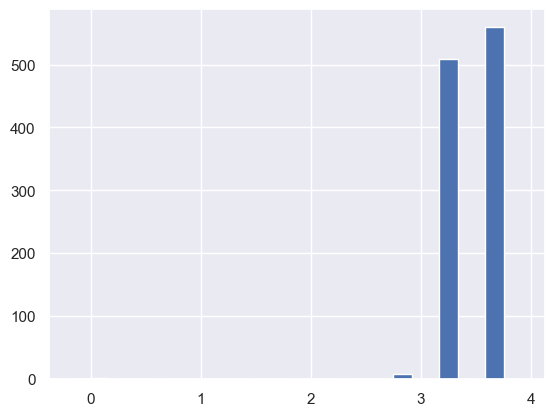

In [47]:
from scipy.stats import boxcox

# Doing symmetric distribution to determine to agg duplicated cost rate on the same date using mean or median
lambda_ = boxcox(df_sel['RATE'])
print(lambda_)
plt.hist(lambda_, bins=10)
plt.show()

In [48]:
from scipy.stats import skew
skewness = skew(df_sel['RATE'])

# print the skewness value
print("Skewness of RATE column: ", skewness)

# check if the skewness is positive or negative
if skewness > 0:
    print("The RATE column is positively skewed")
elif skewness < 0:
    print("The RATE column is negatively skewed")
else:
    print("The RATE column is symmetric")

Skewness of RATE column:  2.8919446068589134
The RATE column is positively skewed


<p>Positive skewed data, it is usually recommended to use the median as the measure of central tendency instead of the mean as cost rates are too spread out. </p>

In [49]:
# Set the POD column as the index
df_sel.set_index('POD', inplace=True)

# Interpolate missing dates in the POD column
df_sel = df_sel.resample('D').interpolate(method='time')

# Resample to daily frequency and aggregate RATE using mean
df_sel = df_sel.resample('D').agg({'RATE': 'median'})

# Reset index to have POD as a column again
df_sel = df_sel.reset_index()

# Making Rate as a float in 2dp
df_sel['RATE'] = df_sel['RATE'].round(2).astype(float)

# Print the resulting dataframe
df_sel.head(10)
df_sel.info()


,POD,RATE
0,2005-07-19,2200.00
1,2005-07-20,2250.00
2,2005-07-21,2300.00
3,2005-07-22,2280.00
4,2005-07-23,2260.00
5,2005-07-24,2240.00
6,2005-07-25,2220.00
7,2005-07-26,2200.00
8,2005-07-27,2333.33
9,2005-07-28,2466.67


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   POD     6427 non-null   datetime64[ns]
 1   RATE    6427 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 100.5 KB


<Figure size 5000x2000 with 0 Axes>

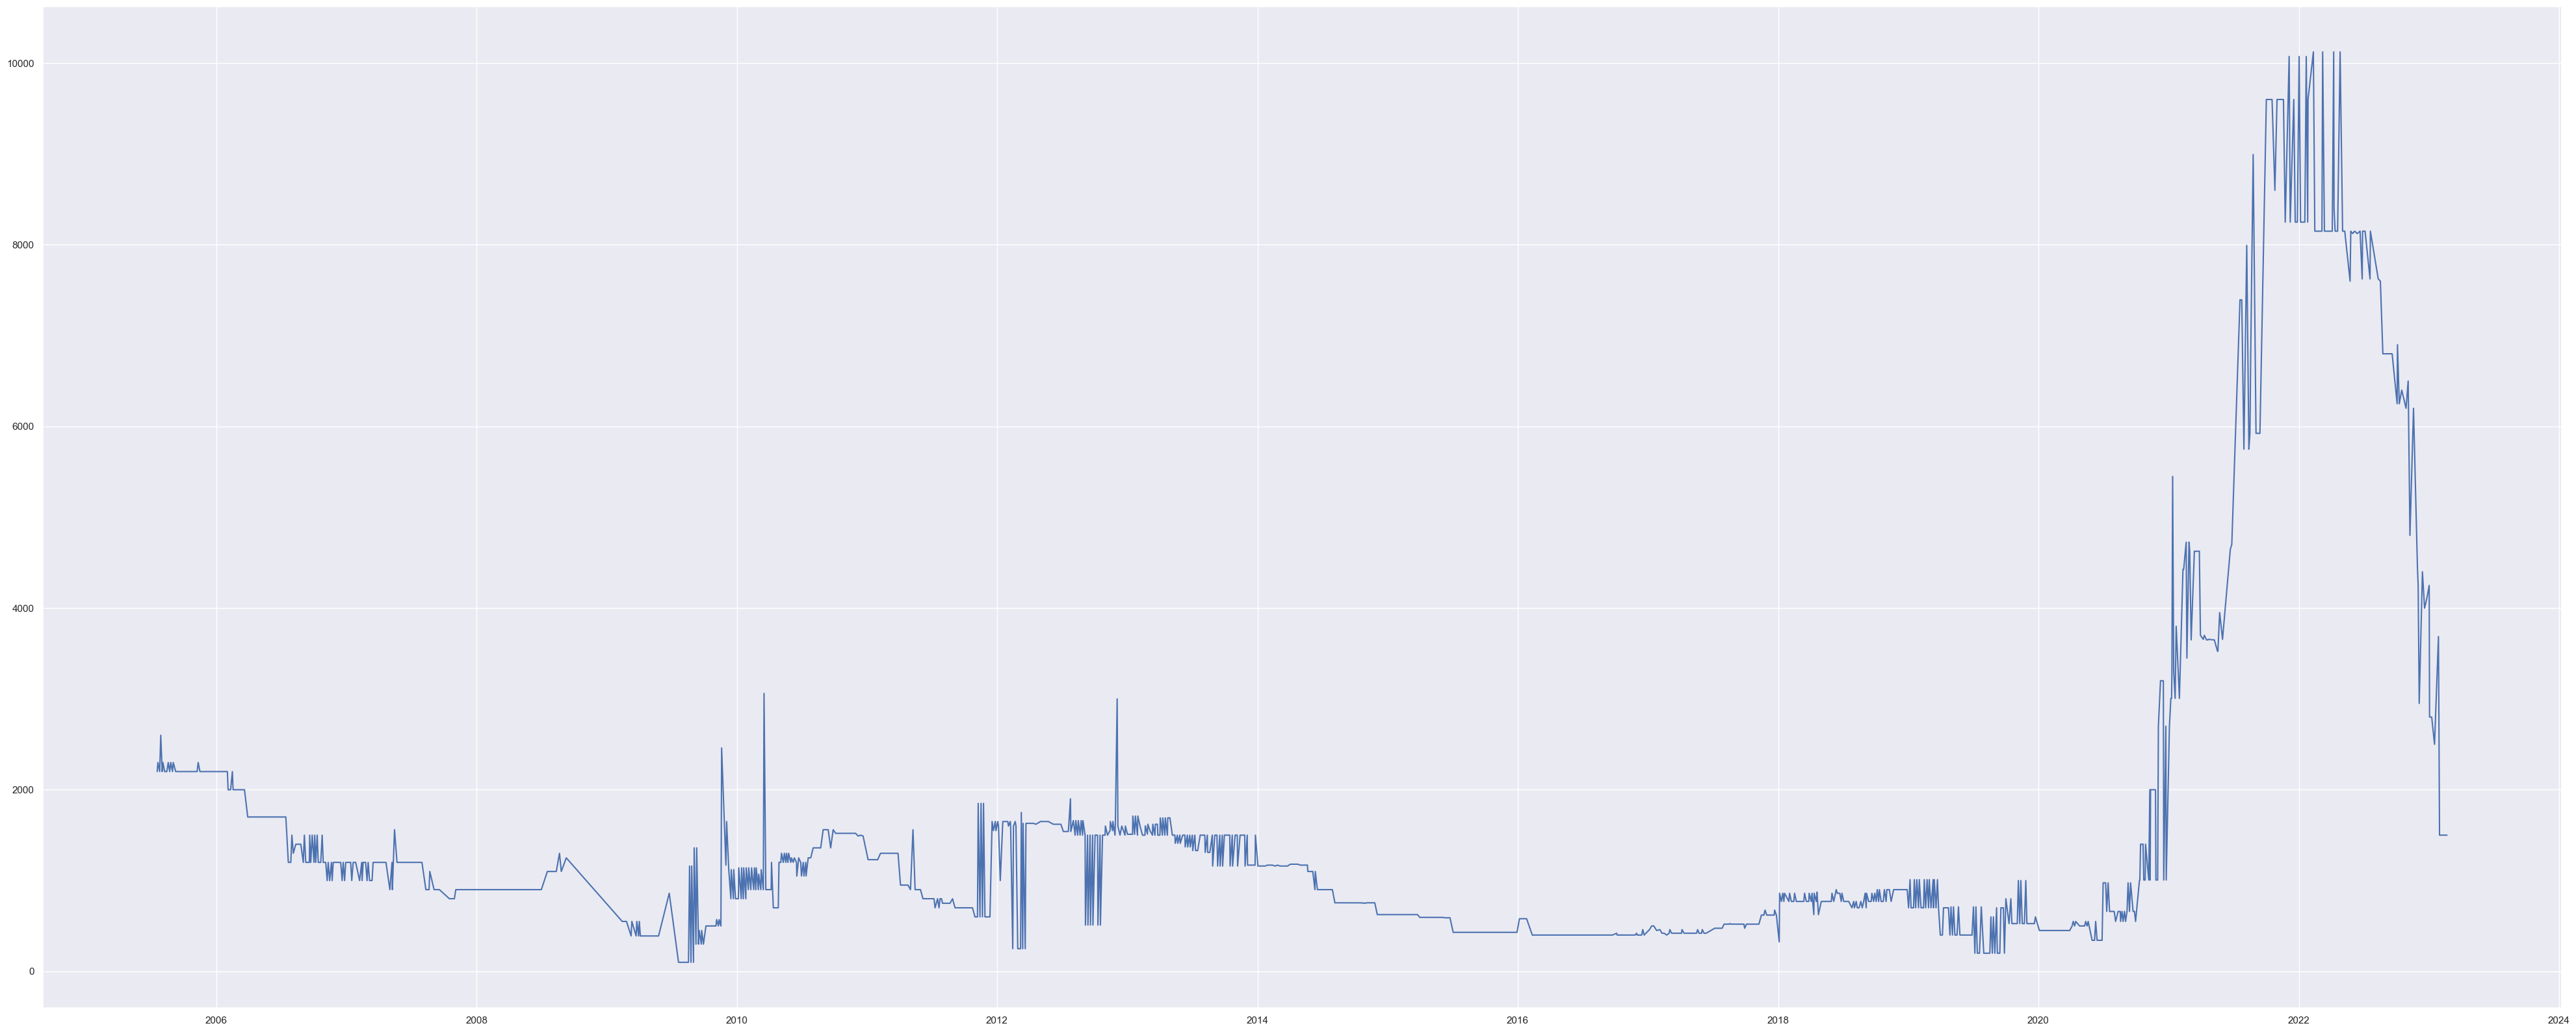

In [50]:
plt.figure(figsize=(50, 20))
plt.plot(df_sel['POD'], df_sel['RATE'])
plt.show()

<h4>Removing Dates from 2023 onwards as 2023 is used to test test the accuracy of the cost rate forecast.</h4>

<Figure size 4000x2000 with 0 Axes>

<Axes: xlabel='POD'>

<Figure size 4000x2000 with 0 Axes>

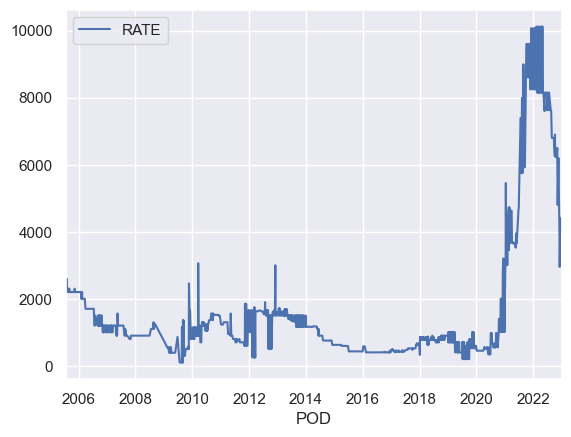

,POD,RATE
0,2005-07-19,2200.0
1,2005-07-20,2250.0
2,2005-07-21,2300.0
3,2005-07-22,2280.0
4,2005-07-23,2260.0


0      2005-07-19
1      2005-07-20
2      2005-07-21
3      2005-07-22
4      2005-07-23
          ...    
6370   2022-12-27
6371   2022-12-28
6372   2022-12-29
6373   2022-12-30
6374   2022-12-31
Name: POD, Length: 6375, dtype: datetime64[ns]


In [51]:
# Filter out the rows with a date in 2023
df_before_2023 = df_sel[df_sel['POD'] < '2023-01-01'].reset_index(drop=True)
df_2023_and_after = df_sel[df_sel['POD'] >= '2023-01-01'].reset_index(drop=True)


plt.figure(figsize=(40, 20))
df_before_2023.plot(x='POD', y='RATE')
plt.show()

df_before_2023.head()
print(df_before_2023['POD'])

<Figure size 6000x3000 with 0 Axes>

<Axes: xlabel='POD'>

<Figure size 6000x3000 with 0 Axes>

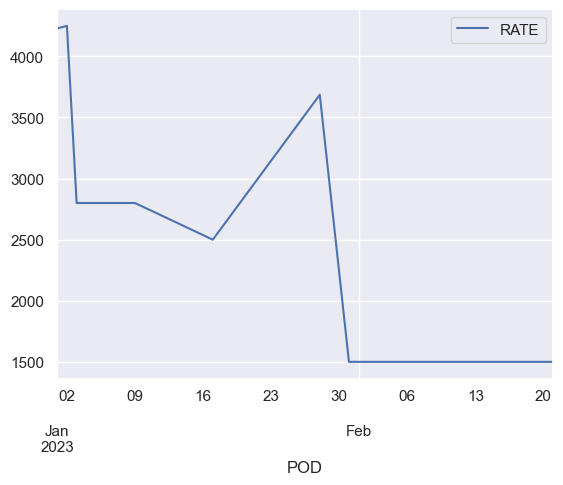

,POD,RATE
0,2023-01-01,4228.57
1,2023-01-02,4250.00
2,2023-01-03,2800.00
3,2023-01-04,2800.00
4,2023-01-05,2800.00


0    2023-01-01
1    2023-01-02
2    2023-01-03
3    2023-01-04
4    2023-01-05
5    2023-01-06
6    2023-01-07
7    2023-01-08
8    2023-01-09
9    2023-01-10
10   2023-01-11
11   2023-01-12
12   2023-01-13
13   2023-01-14
14   2023-01-15
15   2023-01-16
16   2023-01-17
17   2023-01-18
18   2023-01-19
19   2023-01-20
20   2023-01-21
21   2023-01-22
22   2023-01-23
23   2023-01-24
24   2023-01-25
25   2023-01-26
26   2023-01-27
27   2023-01-28
28   2023-01-29
29   2023-01-30
30   2023-01-31
31   2023-02-01
32   2023-02-02
33   2023-02-03
34   2023-02-04
35   2023-02-05
36   2023-02-06
37   2023-02-07
38   2023-02-08
39   2023-02-09
40   2023-02-10
41   2023-02-11
42   2023-02-12
43   2023-02-13
44   2023-02-14
45   2023-02-15
46   2023-02-16
47   2023-02-17
48   2023-02-18
49   2023-02-19
50   2023-02-20
51   2023-02-21
Name: POD, dtype: datetime64[ns]


In [52]:
plt.figure(figsize=(60, 30))
df_2023_and_after.plot(x='POD', y='RATE')
plt.show()

df_2023_and_after.head()
print(df_2023_and_after['POD'])

<h3>Exporting to filted CSV ready for timeseries and non-timeseries modeling. </h3>

In [53]:
df_before_2023.info()
df_before_2023.to_csv('CR_FC_PREP_0522.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   POD     6375 non-null   datetime64[ns]
 1   RATE    6375 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 99.7 KB


In [54]:
df_2023_and_after.info()
df_2023_and_after.to_csv('CR_FC_PREP_23.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   POD     52 non-null     datetime64[ns]
 1   RATE    52 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 960.0 bytes
